# Projeto Redes

Alexandre Young

Bruno Cesconetto

Lucas Chen Alba

In [132]:
import freeman as fm
import networkx as nx
import scipy, pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

pd.options.display.min_rows = 90


In [2]:
# Rede two-mode (repos -> linguagens)

repo_g = fm.load('data/repos_langs.gml')
# Visualization
repo_g.set_all_nodes('size', (9))
repo_g.set_all_nodes('labpos', 'hover')

for n in repo_g.nodes:
    if (n.find('/') == -1):
        repo_g.nodes[n]['color'] = (0, 255, 0)
        repo_g.nodes[n]['size'] = (20)
    repo_g.nodes[n]['label'] = n
repo_g.move('bipartite', [n for n in repo_g.nodes if repo_g.nodes[n]['size'] != 20])
repo_g.draw()

In [3]:
# Rede one-mode (linguagens a partir dos repos)
onemode_repos_g = fm.load('data/repos_langs_onemode.gml')

# Visualization
onemode_repos_g.set_all_nodes('size', (15))
onemode_repos_g.set_all_nodes('labpos', 'hover')

for n in onemode_repos_g.nodes:
    onemode_repos_g.nodes[n]['label'] = n

onemode_repos_g.move('kamada_kawai')
onemode_repos_g.draw()

In [4]:
# onemode_repos_g.set_nodedata('repo_name', 'label')

onemode_repos_g.set_nodecol('betweenness', nx.betweenness_centrality(onemode_repos_g))
onemode_repos_g.set_nodecol('closeness', nx.closeness_centrality(onemode_repos_g))
onemode_repos_g.set_nodecol('degree', onemode_repos_g.degree)
onemode_repos_g.set_nodecol('eigen_vector', nx.eigenvector_centrality(onemode_repos_g))
# onemode_repos_g.set_node('year', onemode_repos_g['year'])


repo_df = onemode_repos_g.nodeframe


In [5]:
# Rede two-mode (devs -> linguagens)
dev_g = fm.load('data/devs_langs.gml')
# Visualization
dev_g.set_all_nodes('size', (9))
dev_g.set_all_nodes('labpos', 'hover')

for n in dev_g.nodes:
    if (n.find('/') != -1):
        dev_g.nodes[n]['color'] = (0, 255, 0)
        dev_g.nodes[n]['size'] = (20)
    dev_g.nodes[n]['label'] = n
dev_g.move('bipartite', [n for n in dev_g.nodes if dev_g.nodes[n]['size'] != 20])
dev_g.draw()

In [6]:
# Rede one-mode (linguagens a partir dos devs)

onemode_devs_g = fm.load('data/devs_langs_onemode.gml')

# Visualization
onemode_devs_g.set_all_nodes('size', (15))
onemode_devs_g.set_all_nodes('labpos', 'hover')

for n in onemode_devs_g.nodes:
    onemode_devs_g.nodes[n]['label'] = n

# onemode_devs_g.move('bipartite', [n for n in onemode_devs_g.nodes if onemode_devs_g.nodes[n]['size'] != 20])
onemode_devs_g.move('kamada_kawai')

onemode_devs_g.draw()

In [7]:
onemode_devs_g.set_nodecol('betweenness', nx.betweenness_centrality(onemode_devs_g))
onemode_devs_g.set_nodecol('closeness', nx.closeness_centrality(onemode_devs_g))
onemode_devs_g.set_nodecol('degree', onemode_devs_g.degree)
onemode_devs_g.set_nodecol('eigen_vector', nx.eigenvector_centrality(onemode_devs_g))

dev_df = onemode_devs_g.nodeframe



In [8]:
repo_df = repo_df.sort_values('id', ascending=1)
# repo_df

In [9]:
dev_df = dev_df.sort_values('id', ascending=1)
# dev_df

In [10]:
# ax = pylab.subplot(111)
# # dev_df['degree'] = np.log(dev_df.degree)
# ax.scatter(dev_df['degree'], repo_df['degree'])
# pylab.xlabel('Devs')
# pylab.ylabel('Repos')
# pylab.suptitle('Degree', fontsize=16)
# ax.figure.show()

In [11]:
# ax = pylab.subplot(111)
# ax.scatter(dev_df['closeness'], repo_df['closeness'])
# pylab.xlabel('Devs')
# pylab.ylabel('Repos')
# pylab.suptitle('Closeness (log)', fontsize=16)
# ax.figure.show()

In [12]:
# ax = pylab.subplot(111)
# ax.scatter(dev_df['betweenness'], repo_df['betweenness'])
# pylab.xlabel('Devs')
# pylab.ylabel('Repos')
# pylab.suptitle('Betweenness', fontsize=16)
# ax.set_xlim([-0.001, 0.04])
# ax.set_ylim([-0.001, 0.006])
# ax.figure.show()



/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



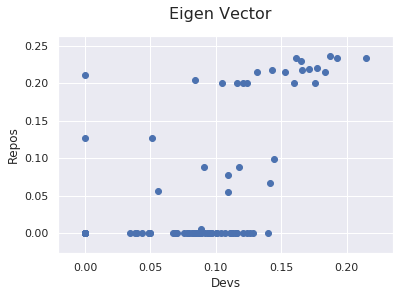

In [13]:
ax = pylab.subplot(111)
ax.scatter(dev_df['eigen_vector'], repo_df['eigen_vector'])
pylab.xlabel('Devs')
pylab.ylabel('Repos')
pylab.suptitle('Eigen Vector', fontsize=16)
ax.figure.show()

In [14]:
# bet_df = pd.DataFrame()
# bet_df['id'] = repo_df['id']
# bet_df['betweenness_repo'] = repo_df['betweenness']
# bet_df['betweenness_dev'] = dev_df['betweenness']


# bet_df.sort_values('betweenness_repo', ascending=0)

In [15]:
# clos_df = pd.DataFrame()
# clos_df['id'] = repo_df['id']
# clos_df['closeness_repo'] = repo_df['closeness']
# clos_df['closeness_dev'] = dev_df['closeness']


# clos_df.sort_values('closeness_repo', ascending=0)

In [16]:
# deg_df = pd.DataFrame()
# deg_df['id'] = repo_df['id']
# deg_df['degree_repo'] = repo_df['degree']
# deg_df['degree_dev'] = dev_df['degree']

# deg_df.sort_values('degree_repo', ascending=0)

In [17]:
# eig_df = pd.DataFrame()
# eig_df['id'] = repo_df['id']
# eig_df['eig_repo'] = repo_df['eigen_vector']
# eig_df['eig_dev'] = dev_df['eigen_vector']

# deg_df.sort_values('eig_dev', ascending=0)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



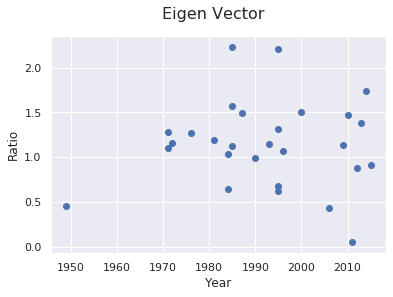

In [18]:
dev_ord_id = dev_df.sort_values('id', ascending=0)
repo_ord_id = repo_df.sort_values('id', ascending=0)

lang_year = {}
for n in onemode_repos_g.nodes:
    try:
        lang_year[onemode_repos_g.nodes[n]['label']] = onemode_repos_g.nodes[n]['year']
    except:
        pass

langs_eig_vec_ratio = []
for i in range(len(repo_df)):
    if((repo_ord_id['degree'][i] > 0) and (dev_ord_id['degree'][i] > 0)):
        langs_eig_vec_ratio.append([((repo_ord_id['eigen_vector'][i] / max(repo_ord_id['eigen_vector'])) / (dev_ord_id['eigen_vector'][i] / max(dev_ord_id['eigen_vector']))), dev_ord_id['id'][i], lang_year[dev_ord_id['id'][i]]])

lang_eig_ratio_df = pd.DataFrame()
lang_eig_ratio_df['id'] = [lang[1] for lang in langs_eig_vec_ratio]
lang_eig_ratio_df['ratio'] = [lang[0] for lang in langs_eig_vec_ratio]
lang_eig_ratio_df['year'] = [lang[2] for lang in langs_eig_vec_ratio]


ax = pylab.subplot(111)
ax.scatter(lang_eig_ratio_df['year'], lang_eig_ratio_df['ratio'])
pylab.xlabel('Year')
pylab.ylabel('Ratio')
pylab.suptitle('Eigen Vector', fontsize=16)
ax.figure.show()

In [81]:
# lang_eig_ratio_df.sort_values('year', ascending=1)
# tmp = lang_eig_ratio_df.sort_values('year', ascending=1)
# tmp = tmp.drop([26, 17])
# tmp

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



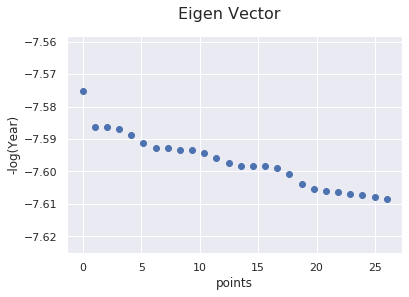

In [97]:
tmp = lang_eig_ratio_df.sort_values('year', ascending=1)
tmp = tmp.drop([26, 17])
tmp['year2'] = [-np.log(year) for year in tmp['year']]
points = np.linspace(0, len(tmp['year2']), len(tmp['year2']))
# print(len(tmp['year2']))
ax = pylab.subplot(111)
ax.scatter(points, tmp['year2'])
pylab.ylabel('-log(Year)')
pylab.xlabel('points')
pylab.suptitle('Eigen Vector', fontsize=16)
ax.figure.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



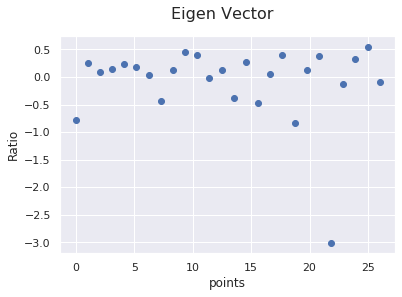

In [144]:
tmp_rat = lang_eig_ratio_df.sort_values('year', ascending=1)
tmp_rat = tmp_rat.drop([26, 17])
tmp_rat['logratio'] = [np.log(year) for year in tmp_rat['ratio']]
points = np.linspace(0, len(tmp_rat['ratio']), len(tmp_rat['ratio']))
# print(len(tmp['year2']))
ax = pylab.subplot(111)
ax.scatter(points, tmp_rat['logratio'])
pylab.ylabel('Ratio')
pylab.xlabel('points')
pylab.suptitle('Eigen Vector', fontsize=16)
ax.figure.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



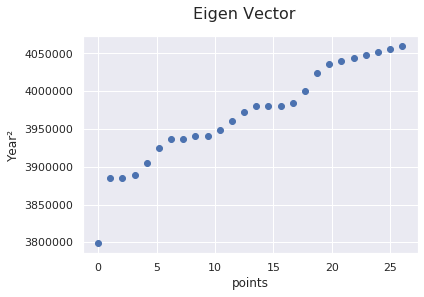

In [88]:
tmp = lang_eig_ratio_df.sort_values('year', ascending=1)
tmp = tmp.drop([26, 17])
tmp['year2'] = [year**2 for year in tmp['year']]
points = np.linspace(0, len(tmp['year2']), len(tmp['year2']))
# print(len(tmp['year2']))
ax = pylab.subplot(111)
ax.scatter(points, tmp['year2'])
pylab.ylabel('Year²')
pylab.xlabel('points')
pylab.suptitle('Eigen Vector', fontsize=16)
ax.figure.show()

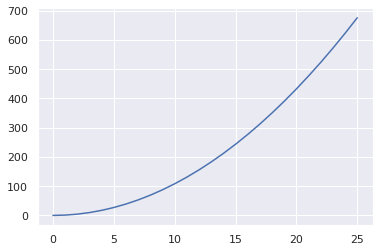

In [139]:
points = np.linspace(0, len(tmp['year2']), len(tmp['year2']))
points = [x**2 for x in points]
plt.plot(points)

In [98]:
model = sm.OLS(tmp['year2'], tmp['ratio'])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  ratio   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              187.6
Date:                Sun, 01 Dec 2019   Prob (F-statistic):                    4.02e-13
Time:                        12:37:01   Log-Likelihood:                         -12.301
No. Observations:                  26   AIC:                                      26.60
Df Residuals:                      25   BIC:                                      27.86
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Coefficients: 
 [[-2.51341924]]
Mean squared error: 75.01
Variance score: 0.00


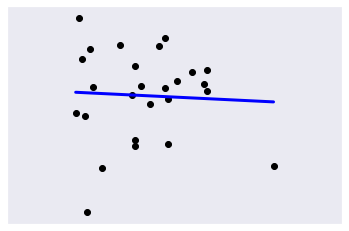

In [131]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

year_test = np.array([[x] for x in tmp['year2']])
year_train = np.array([[x] for x in tmp['year2']])

ratio_test = np.array([[x] for x in tmp['ratio']])
ratio_train = np.array([[x] for x in tmp['ratio']])

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(year_train, ratio_train)

# Make predictions using the testing set
ratio_pred = regr.predict(year_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(year_test, ratio_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ratio_test, ratio_pred))

# Plot outputs
plt.scatter(year_test, ratio_test,  color='black')
plt.plot(year_test, ratio_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [21]:
# langs_deg_ratio = []
# for i in range(len(repo_df)):
#     if((repo_ord_id['degree'][i] > 0) and (dev_ord_id['degree'][i] > 0)):
#         langs_deg_ratio.append([((repo_ord_id['degree'][i] / max(repo_ord_id['degree'])) / (dev_ord_id['degree'][i] / max(dev_ord_id['degree']))), dev_ord_id['id'][i], lang_year[dev_ord_id['id'][i]]])

# lang_deg_ratio_df = pd.DataFrame()
# lang_deg_ratio_df['id'] = [lang[1] for lang in langs_deg_ratio]
# lang_deg_ratio_df['ratio'] = [lang[0] for lang in langs_deg_ratio]
# lang_deg_ratio_df['year'] = [lang[2] for lang in langs_deg_ratio]


# ax = pylab.subplot(111)
# ax.scatter(lang_deg_ratio_df['year'], lang_deg_ratio_df['ratio'])
# pylab.xlabel('Year')
# pylab.ylabel('Ratio')
# pylab.suptitle('Degree', fontsize=16)
# ax.figure.show()

In [22]:
# langs_bet_ratio = []
# for i in range(len(repo_df)):
#     if((repo_ord_id['degree'][i] > 0) and (dev_ord_id['degree'][i] > 0)):
#         langs_bet_ratio.append([((repo_ord_id['betweenness'][i] / max(repo_ord_id['betweenness'])) / (dev_ord_id['betweenness'][i] / max(dev_ord_id['betweenness']))), dev_ord_id['id'][i], lang_year[dev_ord_id['id'][i]]])

# lang_bet_ratio_df = pd.DataFrame()
# lang_bet_ratio_df['id'] = [lang[1] for lang in langs_bet_ratio]
# lang_bet_ratio_df['ratio'] = [lang[0] for lang in langs_bet_ratio]
# lang_bet_ratio_df['year'] = [lang[2] for lang in langs_bet_ratio]


# ax = pylab.subplot(111)
# ax.scatter(lang_bet_ratio_df['year'], lang_bet_ratio_df['ratio'])
# pylab.xlabel('Year')
# pylab.ylabel('Ratio')
# pylab.suptitle('Betweenness', fontsize=16)
# ax.figure.show()

In [23]:
# langs_clos_ratio = []
# for i in range(len(repo_df)):
#     if((repo_ord_id['degree'][i] > 0) and (dev_ord_id['degree'][i] > 0)):
#         langs_clos_ratio.append([((repo_ord_id['closeness'][i] / max(repo_ord_id['closeness'])) / (dev_ord_id['closeness'][i] / max(dev_ord_id['closeness']))), dev_ord_id['id'][i], lang_year[dev_ord_id['id'][i]]])

# lang_clos_ratio_df = pd.DataFrame()
# lang_clos_ratio_df['id'] = [lang[1] for lang in langs_clos_ratio]
# lang_clos_ratio_df['ratio'] = [lang[0] for lang in langs_clos_ratio]
# lang_clos_ratio_df['year'] = [lang[2] for lang in langs_clos_ratio]


# ax = pylab.subplot(111)
# ax.scatter(lang_clos_ratio_df['year'], lang_clos_ratio_df['ratio'])
# pylab.xlabel('Year')
# pylab.ylabel('Ratio')
# pylab.suptitle('Closeness', fontsize=16)
# ax.figure.show()